# Simple 1D-CNN Practice

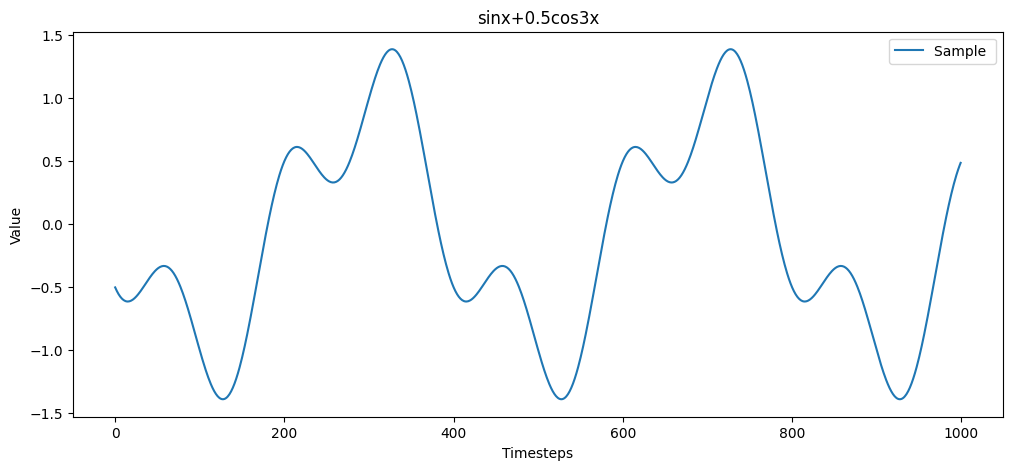

c:\Users\24114\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 26, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 832)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        53,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,809 (233.63 KB)

 Trainable params: 59,809 (233.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0693 - val_loss: 3.9422e-04
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6724e-04 - val_loss: 2.6777e-04
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3769e-04 - val_loss: 7.7360e-05
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8026e-04 - val_loss: 5.4990e-05
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2672e-05 - val_loss: 2.5527e-04
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8602e-04 - val_loss: 2.1896e-05
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8817e-05 - val_loss: 1.6654e-05
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9296e-05 - val_loss: 1.8981e-04
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5482e-05 - val_loss: 2.6135e-05
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8740e-05 - val_loss: 2.5787e-05
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.

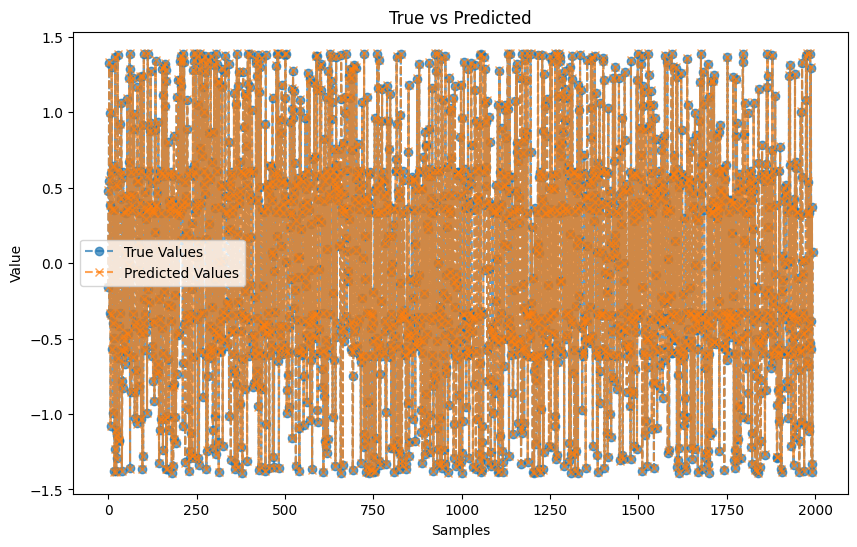

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



x = np.linspace(0, 50*np.pi, 10000)           # create 10000 point averagely in span (0,50*Pi). The gap between is 0.005*Pi
y = np.sin(x) + 0.5*np.cos(3*x)               # the function we set for getting values for training as known data

x0 = x.reshape(10,1000)                       # split list-x into 10 averagely, in convenience to show a part of the function
y0 = np.sin(x0) + 0.5*np.cos(3*x0)

plt.figure(figsize=(12, 5)) 
plt.plot(y0[1], label="Sample ")              # plot, in sequence number 0-999, instead of real value within 0-50*Pi, totally 10 curves
plt.title("sinx+0.5cos3x")
plt.xlabel("Timesteps")
plt.ylabel("Value")
plt.legend()
plt.show()

# create samples. 'known' is ga
known = 30                                    # we use 30 continuous data to predict the next one.
X = []                                        # 2 lists to accommodate input data and output data for training.
y1 = []
for i in range(len(y) - known):               # [1,2,3][2,3,4][3,4,5],like this. If 1000 point, 20 per group, then we have 1000-20=980 data groups
    X.append(y[i:i+known])                    # by index, we have X as input list and y1 as output value. X=[[],[],[]], y1=[,,]
    y1.append(y[i+known])

X = np.array(X)
y_target = np.array(y1)

X = X[..., np.newaxis]                        # add dimension from 2 to 3: (sample, points) --> (sample, points, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42)
# split the dataset for train and test (0.2 means 20% data for test)
# '42'makes every split results the same, not random or changed


# build a simple 1D-CNN by tensorflow.keras (Sequential means linear connenction between layers, a very simple NN structure)
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(known, 1)),             # ReLU: f(x)=max(0,x), take non-negative value
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)                                  # output single value
])


model.compile(optimizer='adam', loss='mse')   # compile the model(specialize the optimization methods for training iteration process)(here no metrics is ok)
model.summary()                               # print out the info of NN structure


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# training processing. 50 epoches mean 50 iterations for whole process


loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")                   # evaluate the model by loss and print below

# prediction
y_pred = model.predict(X_test)

# visualize: true vs predicted
plt.figure(figsize=(10, 6))                   # a picture,10*6 inch square
plt.plot(y_test, label="True Values", marker='o', linestyle='dashed', alpha=0.7)         # plot curve for real values
plt.plot(y_pred, label="Predicted Values", marker='x', linestyle='dashed', alpha=0.7)    # plot curve for predicted values
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Value")
plt.title("True vs Predicted")
plt.show()
